<a href="https://colab.research.google.com/github/marcovalle2000/group24_housing/blob/master/07_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd #to read csv files
import numpy as np #to make calculations on data
import matplotlib.pyplot as plt #we import Matplotlib, a library that allows us to do plotting on the data (and so allows us to visualize the distribution of the data)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [0]:
#bar graph test

#objects = ("STEM Center", "CES", "LTB", "IC Hall", "ABC")
#y_pos = np.arange(len(objects))
#performance = [10, 8,6,2,1]

#plt.bar(y_pos, performance, align="center", alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel("Uso")
#plt.title("Prova")

In [0]:
#this will create a dataframe from the csv file
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
#check the size of the data (Test should have one column less than Train, the SalePrice column)
print ("train.csv size: ", train.shape)
print ("test.csv size: ", test.shape)

train.csv size:  (1460, 81)
test.csv size:  (1459, 80)


In [11]:
#print few rows to check if the data has been read correctly as it is in the file
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#we use Matplotlib to do plotting and so to create graphs to visualize data
#here we initialize the 'characteristics' that every graph will have (color + size)
plt.style.use(style="dark_background")
plt.rcParams["figure.figsize"] = (7, 4)

In [0]:
#print information about our target that we want to predict, the SalePrice
#train.SalePrice.describe()

Skewness: 1.8828757597682129


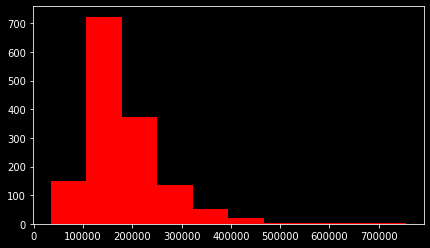

In [14]:
#we check for skewness, the measure of the shape of the distribution of values
#plt is for plotting
#.hist() create a histogram

print ("Skewness:", train.SalePrice.skew())
plt.hist(train.SalePrice, color="red")
plt.show()

In [0]:
#the distribution goes longer on the right, so it's positively skewed

Skewness: 0.12133506220520406


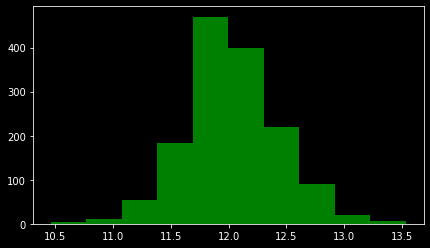

In [16]:
#now I try to improve the result and get a skewness closer to 0
target = np.log(train.SalePrice)
print ("Skewness:", target.skew())
plt.hist(target, color="green")
plt.show()

In [0]:
#First, we’ll check out the numerical features and make some plots. 
#The .select_dtypes() method return a subset of columns matching the specified data types.

In [18]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [19]:
#.corr() shows the correlation between all the features and the one specified (SalePrice)
corr = numeric_features.corr()
print (corr["SalePrice"].sort_values(ascending=False)[:5], '\n')
print (corr["SalePrice"].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [0]:
#the first five are the most correlated with SalePrice. the other five are the least correlated

In [21]:
#I start analyse the overall quality by using .unique() to get the unique values of OverallQuall
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [0]:
# 1<= data <=10

In [23]:
quality = train.pivot_table(index="OverallQual", values="SalePrice", aggfunc=np.median)
quality

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


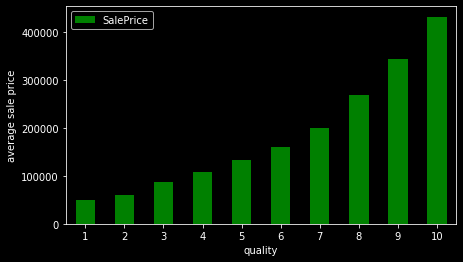

In [24]:
quality.plot(kind="bar", color="green")
plt.xlabel("quality")
plt.ylabel("average sale price")
plt.xticks(rotation=0)
plt.show()

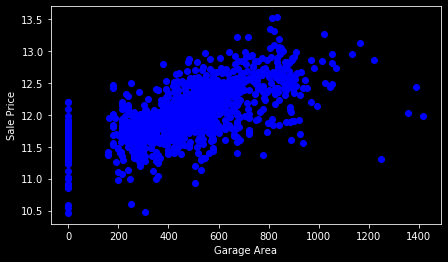

In [25]:
plt.scatter(x=train["GarageArea"], y=target, color="b")
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")
plt.show()

In [0]:
train = train[train["GarageArea"] < 1200]

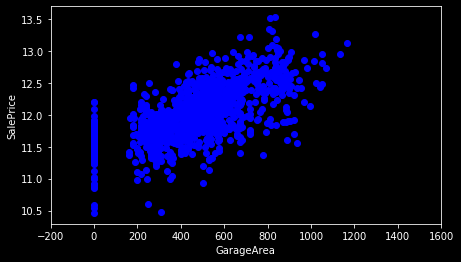

In [27]:
plt.scatter(x=train["GarageArea"], y=np.log(train.SalePrice), color="b")
plt.xlim(-200, 1600) #set the limits of the axes
plt.ylabel("SalePrice")
plt.xlabel("GarageArea")
plt.show()

In [28]:
nulli = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulli.columns = ["Null Count"]
nulli.index.name = "Feature";
nulli

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [29]:
print ("Unique values:", train.MiscFeature.unique())

Unique values: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [30]:
category = train.select_dtypes(exclude = [np.number])
category.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


In [31]:
print ("Original: ")
print (train.Street.value_counts())

Original: 
Pave    1450
Grvl       5
Name: Street, dtype: int64


In [0]:
train["enc_street"] = pd.get_dummies(train.Street, drop_first=True)
test["enc_street"] = pd.get_dummies(train.Street, drop_first=True)

In [33]:
print ("Encoded: ")
print (train.enc_street.value_counts())

Encoded: 
1    1450
0       5
Name: enc_street, dtype: int64


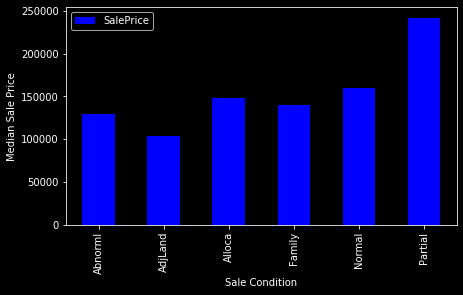

In [34]:
condition = train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
condition.plot(kind="bar", color="blue")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=90)
plt.show()

In [0]:
def encode(x):
 return 1 if x == "Partial" else 0
train["enc_condition"] = train.SaleCondition.apply(encode)
test["enc_condition"] = test.SaleCondition.apply(encode)

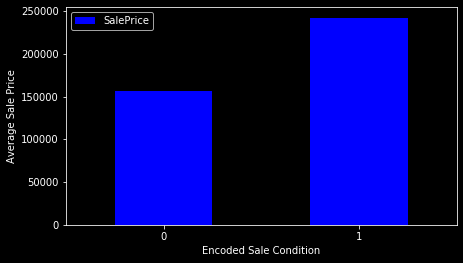

In [36]:
condition = train.pivot_table(index="enc_condition", values="SalePrice", aggfunc=np.median)
condition.plot(kind="bar", color="blue")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=0)
plt.show()

In [0]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [38]:
sum(data.isnull().sum() != 0)

0

In [0]:
y = np.log(train.SalePrice)
X = data.drop(["SalePrice", "Id"], axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [0]:
lr = linear_model.LinearRegression()

In [0]:
model = lr.fit(X_train, y_train)

In [43]:
print ("R^2 is: ", model.score(X_test, y_test))

R^2 is:  0.8882477709262494


In [0]:
predictions = model.predict(X_test)

In [45]:
print ("RMSE is: ", mean_squared_error(y_test, predictions))

RMSE is:  0.017841794519568518


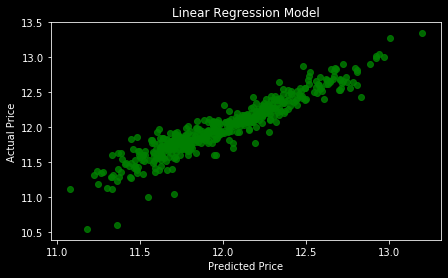

In [46]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.8, color="g") #alpha is like a mix of opacity and brightness that helps visualizing overlapping data
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Linear Regression Model")
plt.show()

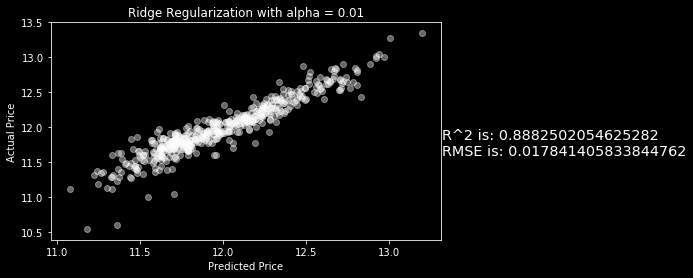

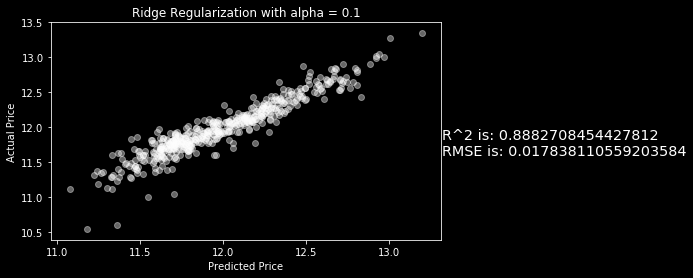

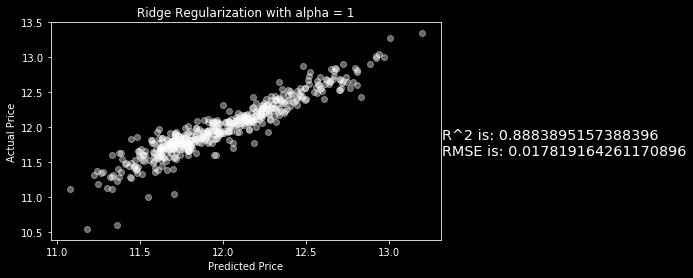

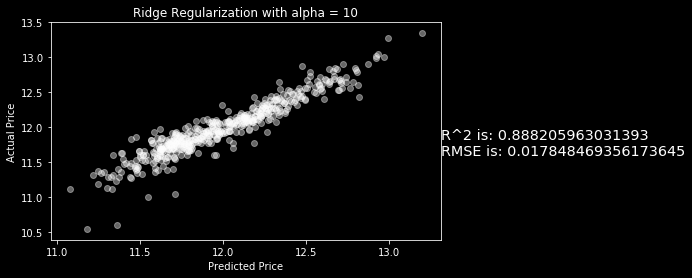

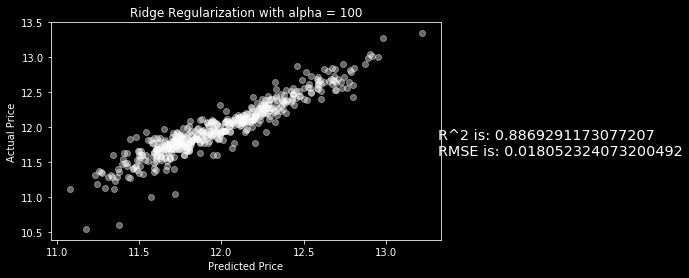

In [47]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.40, color='w')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Ridge Regularization with alpha = {}".format(alpha))
    overlay = "R^2 is: {}\nRMSE is: {}".format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(13.315,11.6), size="x-large")
    plt.show()

In [0]:
submission = pd.DataFrame()
submission["Id"] = test.Id

In [0]:
feats = test.select_dtypes(include=[np.number]).drop(["Id"], axis=1).interpolate()

In [0]:
predictions = model.predict(feats)

In [0]:
final_predictions = np.exp(predictions)

In [52]:
print ("Original predictions are: ", predictions[:5], "\n")
print ("Final predictions are: ", final_predictions[:5])

Original predictions are:  [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are:  [128959.49172586 122920.74024355 175704.82598101 200050.83263755
 182075.46986405]


In [53]:
submission["SalePrice"] = final_predictions
submission.head()


,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [0]:
submission.to_csv("final_submission.csv", index=False)